# Question 1.1

In [20]:
import pandas
import matplotlib.pyplot as plt

In [21]:
data = pandas.read_csv('../SQL(DataBase)/measurements.csv')
grouped = data.groupby('Product_Code').agg({'T_Height': ['mean', 'std'], 'T_Weight': ['mean', 'std']})
grouped.columns = ['Height_Mean', 'Height_Std', 'Weight_Mean', 'Weight_Std']

print(grouped)

              Height_Mean  Height_Std  Weight_Mean  Weight_Std
Product_Code                                                  
LIF001_B          8.94075    0.262551     384.9100    0.323316
LIF001_Y         10.26850    0.852276     382.8250    7.287700
LIF002_R          9.30775    0.893526     314.7225   17.176708
LIF002_Y          8.18975    0.452906     523.7950    6.458506


# Question 1.2

In [56]:
measurements_df = pandas.read_csv('../SQL(DataBase)/measurements.csv')
specifications_df = pandas.read_csv('../SQL(DataBase)/specifications.csv')  

In [57]:
merged_df = measurements_df.merge(specifications_df, on='Product_Code')

In [58]:
defective_height = merged_df[merged_df['T_Height'] > merged_df['USL']]
defective_weight = merged_df[merged_df['T_Weight'] > merged_df['USL']]

defective_parts = pandas.concat([defective_height, defective_weight])

In [59]:
defective_counts = defective_parts['Product_Code'].value_counts() #count by family

In [60]:
defective_counts_sorted = defective_counts.sort_values(ascending=False) #sort defects descending

In [61]:
cumulative_percentage = (defective_counts_sorted.cumsum() / defective_counts_sorted.sum()) * 100

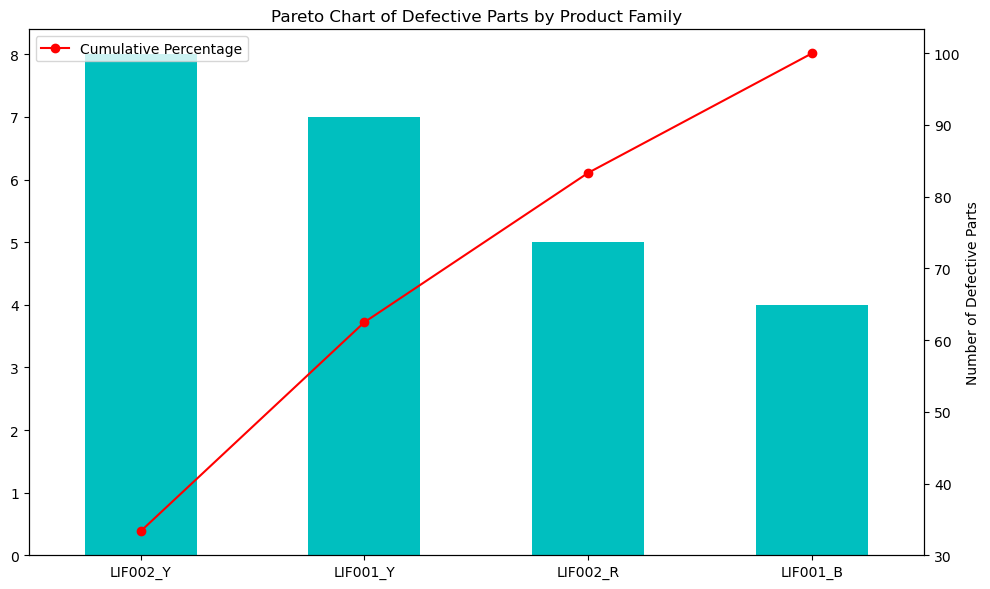

The product family with the most defects is 'LIF002_Y' with 8 defective parts.


In [62]:
# Create Pareto chart
plt.figure(figsize=(10, 6))
ax = defective_counts_sorted.plot(kind='bar', color='c')
cumulative_percentage.plot(kind='line', color='r', marker='o', ax=ax, secondary_y=True)

plt.title('Pareto Chart of Defective Parts by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Number of Defective Parts')
plt.legend(['Cumulative Percentage'], loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


most_defective_family = defective_counts_sorted.index[0]
defect_count = defective_counts_sorted.iloc[0]

print(f"The product family with the most defects is '{most_defective_family}' with {defect_count} defective parts.")

# Question 1.3

The best way to determine the process control is by constructing control charts

In [69]:
data = pandas.read_csv('../SQL(DataBase)/ProductMetrics.csv')

In [70]:
unique_product_codes = data['Product_Code'].unique()
unique_t_names = data['T_Name'].unique()

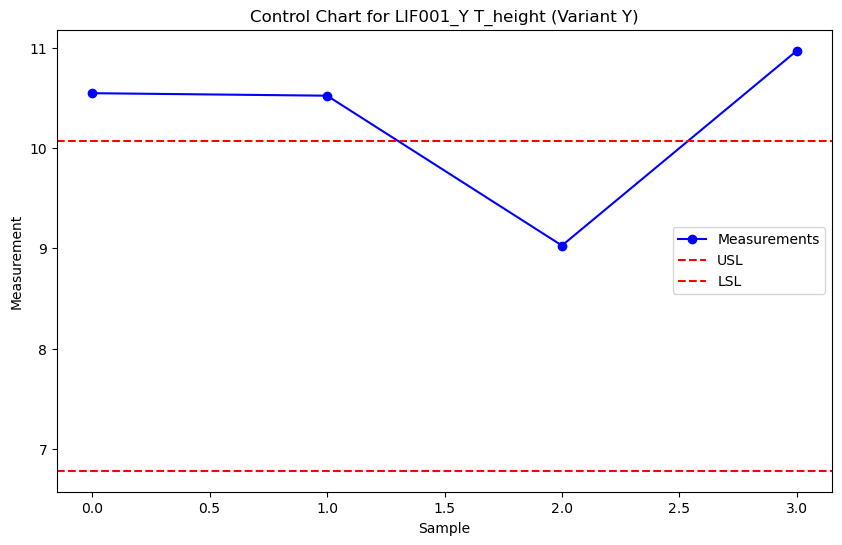

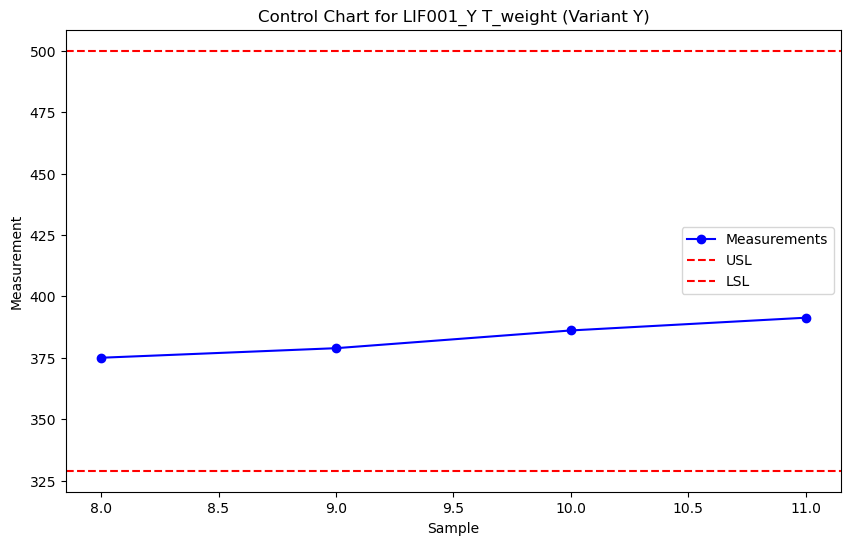

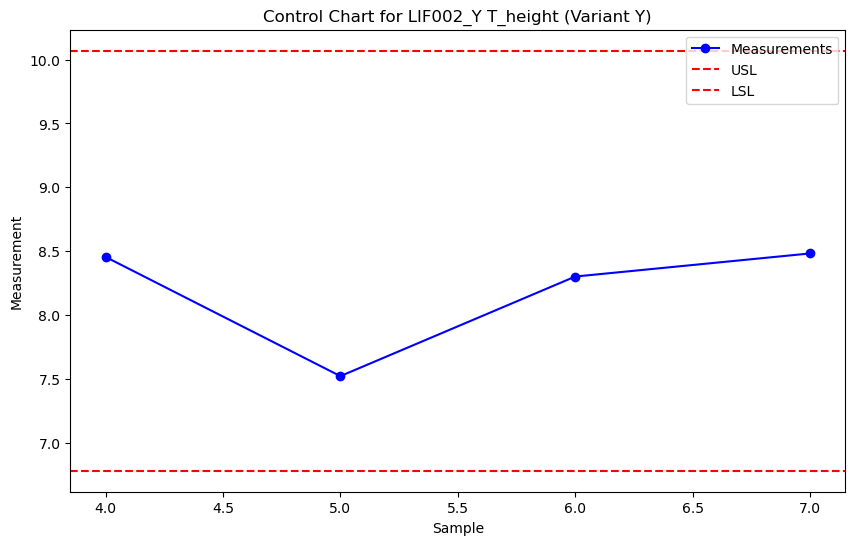

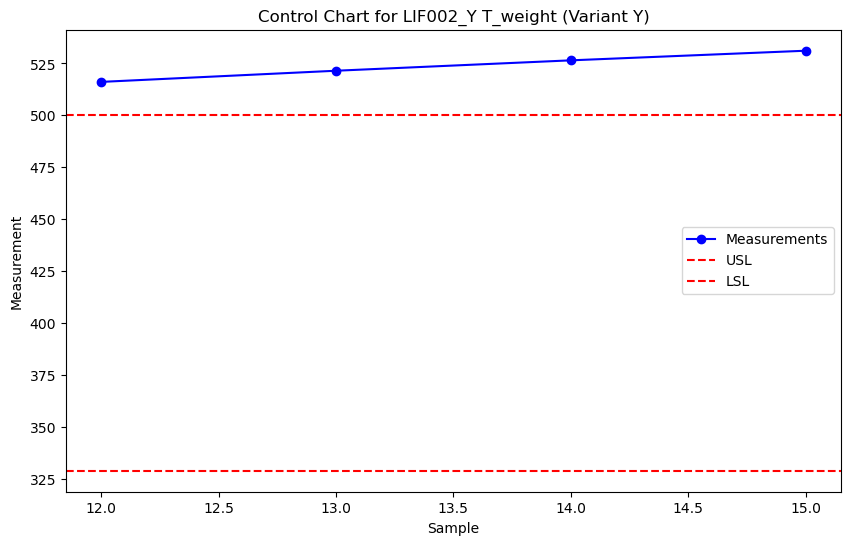

In [71]:
# Iterate through unique combinations and create control charts
for product_code in unique_product_codes:
    for t_name in unique_t_names:
        filtered_data = data[(data['Variant'] == 'Y') & (data['Product_Code'] == product_code) & (data['T_Name'] == t_name)]
        
        if not filtered_data.empty:
            fig, ax = plt.subplots(figsize=(10, 6))
            
            # Plot the data points
            ax.plot(filtered_data.index, filtered_data['M'], marker='o', linestyle='-', color='b', label='Measurements')
            
            # Plot the upper and lower limits
            ax.axhline(filtered_data['USL'].values[0], color='r', linestyle='--', label='USL')
            ax.axhline(filtered_data['LSL'].values[0], color='r', linestyle='--', label='LSL')
            
            # Set labels and title
            ax.set_xlabel('Sample')
            ax.set_ylabel('Measurement')
            ax.set_title(f'Control Chart for {product_code} {t_name} (Variant Y)')
            ax.legend()
            
            plt.show()

In [72]:
proportions = {}

In [73]:
for product_code in unique_product_codes:
    for t_name in unique_t_names:
        filtered_data = data[(data['Variant'] == 'Y') & (data['Product_Code'] == product_code) & (data['T_Name'] == t_name)]
        
        if not filtered_data.empty:
            within_limits = filtered_data[(filtered_data['M'] >= filtered_data['LSL']) & (filtered_data['M'] <= filtered_data['USL'])]
            proportion_within_limits = len(within_limits) / len(filtered_data)
            proportions[(product_code, t_name)] = proportion_within_limits


In [74]:
# Find the combination with the best process control
best_combination = max(proportions, key=proportions.get)
best_proportion = proportions[best_combination]

print("The combination with the best process control:")
print("Product_Code:", best_combination[0])
print("T_Name:", best_combination[1])
print("Proportion of data within control limits:", best_proportion)

The combination with the best process control:
Product_Code: LIF001_Y
T_Name: T_weight
Proportion of data within control limits: 1.0


# Question 1.4

In [75]:
data = pandas.read_csv('../SQL(DataBase)/measurements.csv')

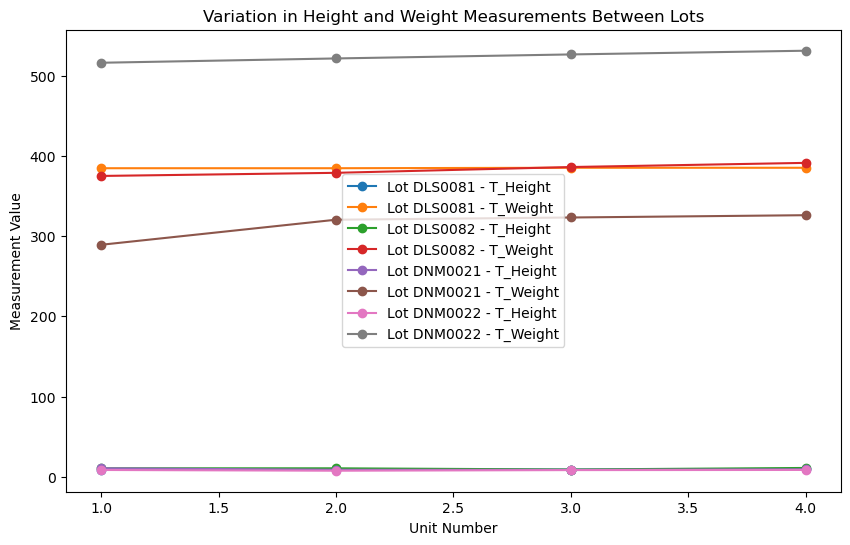

Defect Count by Lot and Product Family:
         Unit_No  Product_Code  Defect Count  Defect Count
Lot_No                                                    
DLS0081        4             4             4             4
DLS0082        4             4             4             4
DNM0021        4             4             4             4
DNM0022        4             4             4             4


In [76]:
# Visualize how height and weight measurements vary between lots
plt.figure(figsize=(10, 6))
for lot_no, lot_data in data.groupby('Lot_No'):
    plt.plot(lot_data['Unit_No'], lot_data['T_Height'], marker='o', label=f'Lot {lot_no} - T_Height')
    plt.plot(lot_data['Unit_No'], lot_data['T_Weight'], marker='o', label=f'Lot {lot_no} - T_Weight')

plt.xlabel('Unit Number')
plt.ylabel('Measurement Value')
plt.title('Variation in Height and Weight Measurements Between Lots')
plt.legend()
plt.show()

# Create a pivot table to see defect count by lot and product family
pivot_table = data.groupby('Lot_No').count().rename(columns={'T_Height': 'Defect Count', 'T_Weight': 'Defect Count'})
print("Defect Count by Lot and Product Family:")
print(pivot_table)

# Question 1.5

It is not possible to predict the values for product G since there are no previous data related to variant G. However, a good way to get an estimate for the variant values is if there is any information about previous variant G values or if the values are close to one of the given variants' mean and standard deviation.